In [1]:
import wandb
import pandas as pd

In [2]:
run = wandb.init(
    project="nyc_airbnb",
    save_code=True
)

wandb: Currently logged in as: hciw66. Use `wandb login --relogin` to force relogin


In [3]:
artifact = run.use_artifact("nyc_airbnb/sample.csv:latest")
df = pd.read_csv(artifact.file())
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile.to_widgets()

In [5]:
profile.to_file('nyc_airbnb_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='raise')

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [9]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [29]:
sum(df['last_review'].isna())  

4123

In [22]:
df['last_review'].iloc[1]

NaT

In [32]:
df[df['last_review'].isna()]['number_of_reviews'].max()  # all the records with missing 'last_review' has number_of_review=0

0

In [33]:
df[df['last_review'].isna()]['reviews_per_month'].unique()

array([nan])

In [34]:
df['neighbourhood'].value_counts().sort_values()  #top_5 account for about 1/4 of reports

Woodrow                  1
Tottenville              1
New Dorp                 1
New Dorp Beach           1
Todt Hill                1
                      ... 
Upper West Side        798
Bushwick               987
Harlem                1116
Bedford-Stuyvesant    1503
Williamsburg          1580
Name: neighbourhood, Length: 217, dtype: int64

In [36]:
neighgroup_neighborhood = df.groupby('neighbourhood_group')['neighbourhood'].unique()

In [38]:
neighgroup_neighborhood.loc['Bronx']

array(['Eastchester', 'Williamsbridge', 'Bronxdale', 'Fordham',
       'Throgs Neck', 'University Heights', 'Concourse Village',
       'Mott Haven', 'Van Nest', 'Clason Point', 'Allerton', 'Concourse',
       'Wakefield', 'Port Morris', 'Baychester', 'Kingsbridge',
       'Highbridge', 'Mount Hope', 'Belmont', 'City Island',
       'Morris Park', 'Unionport', 'North Riverdale', 'Parkchester',
       'Pelham Gardens', 'Claremont Village', 'Melrose', 'Fieldston',
       'Westchester Square', 'Norwood', 'Co-op City', 'Riverdale',
       'Longwood', 'Hunts Point', 'Pelham Bay', 'Morris Heights',
       'Tremont', 'Morrisania', 'East Morrisania', 'Spuyten Duyvil',
       'Schuylerville', 'Soundview', 'Edenwald', 'Woodlawn', 'Mount Eden',
       'Castle Hill', 'Olinville'], dtype=object)

In [39]:
df.groupby('neighbourhood')['neighbourhood_group'].nunique().sort_values()  #every neighboruhood only belong to one neighborhood_group

neighbourhood
Allerton        1
Navy Yard       1
Neponsit        1
New Brighton    1
New Dorp        1
               ..
Flushing        1
Fordham         1
Forest Hills    1
Elmhurst        1
Woodside        1
Name: neighbourhood_group, Length: 217, dtype: int64

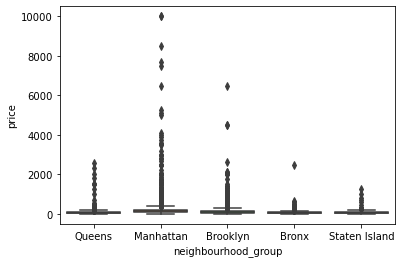

In [40]:
import seaborn as sns  # lots of price outlier
ax = sns.boxplot(x="neighbourhood_group", y="price", data=df)

In [43]:
df[df['price'].between(10, 350)].shape

(19001, 16)

In [44]:
df_rmOutlier = df[df.price.between(10,350)]

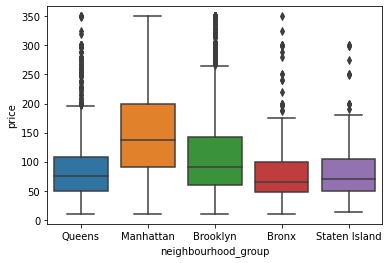

In [45]:
ax = sns.boxplot(x="neighbourhood_group", y="price", data=df_rmOutlier)

In [47]:
profile_2 = ProfileReport(df_rmOutlier, title="Pandas Profiling Report", explorative=True)

In [48]:
profile_2.to_file('nyc_airbnb_remove_price_outlier_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
run.finish()